<a href="https://colab.research.google.com/github/Akbar-fitriawan/tutorial-machine-learning/blob/main/Logistic_Regresi_kasus_calon_pembeli_mobil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


## Generate Data

In [120]:
df1 = pd.read_csv('/content/calonpembeli_ch5.csv')
df1

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [121]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


## Mempersiapkan traing dataset

In [122]:
df1 = df1[df1['Usia'] <= 100]

In [123]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [124]:
df1['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

## Memisahkan training data dan test data

In [125]:
X = df1[['Usia','Status','Kelamin','Memiliki_Mobil','Penghasilan']]
y = df1.Beli_Mobil

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [126]:
print(X_train,y_train)

     Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
694    39       3        0               1          273
518    52       1        1               1          181
882    36       2        1               0          315
113    42       3        0               1          233
873    40       1        1               1          418
..    ...     ...      ...             ...          ...
837    37       0        0               1          369
192    37       2        0               1          290
631    44       0        1               2          222
561    42       2        1               2          180
686    44       2        0               0          216

[798 rows x 5 columns] 694    1
518    0
882    1
113    1
873    1
      ..
837    1
192    1
631    1
561    0
686    0
Name: Beli_Mobil, Length: 798, dtype: int64


## Membuat model

In [127]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)


LogisticRegression()

In [128]:
print(model.coef_)

[[-0.01594363 -0.17093162 -1.03941673  0.07720411  0.05686702]]


## Coba Prediksi

In [129]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [130]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [131]:
y_test.head(1)

272    1
Name: Beli_Mobil, dtype: int64

In [132]:
import sklearn.metrics as met
confusionMetrix = met.confusion_matrix(y_test,y_prediksi)
confusionMetrix

array([[ 59,   4],
       [  5, 132]])

In [133]:
Tp = confusionMetrix[0][0]
Fp = confusionMetrix[0][1]
Fn = confusionMetrix[1][0]
Tn = confusionMetrix[1][1]

print(Tp)
print(Fp)
print(Fn)
print(Tn)
#accuracy
kenyataan = Tp + Tn
akurasi = Tp + Tn + Fp + Fn
hasil = kenyataan / akurasi
print(hasil)

59
4
5
132
0.955


In [134]:
#accuracy rumus : Tp + Tn / (Tp+Tn+Fp+Fn)
score = model.score(X_test,y_test)
print(score)

0.955


In [135]:
# precision rumus Tp / Total_yang_diprediksi_posiif = Tp/(Tp+Fp)
precision = met.precision_score(y_test,y_prediksi)
print(precision)

0.9705882352941176


In [136]:
total_prediksi_positif = Tp+Fp
precision_nya = Tp / total_prediksi_positif
print(precision_nya) # tidak tau kok beda

0.9365079365079365


In [137]:
# sensitivity rumus Tp / Total_semua_kenyataan_positif = Tp/(Tp + Fn)
total_semua_kenyataan_positif = Tp + Fn
sensitif_nya = Tp / total_semua_kenyataan_positif
print(sensitif_nya)

0.921875


In [138]:
# AUC (Area Under Curve)
auc = met.roc_auc_score(y_test,y_prediksi)
print(auc)

0.9500057930714866


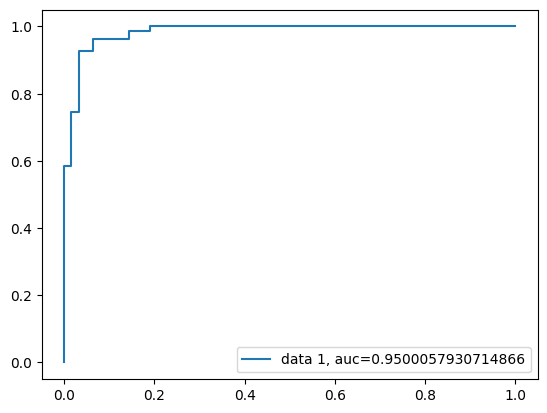

In [139]:
# kurva ROC (Receiver Operating Characteristic)
auc = met.roc_auc_score(y_test,y_prediksi)
y_pred_proba = model.predict_proba(X_test)[::,1]
fp,tp, _ = met.roc_curve(y_test, y_pred_proba)
plt.plot(fp,tp,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [140]:
# RFE (Recursive Feature Elimintaion)
import sklearn.feature_selection as fs
rfe = fs.RFE(model,n_features_to_select=3)

rfe = rfe.fit(X_train, y_train)
print('support = ', rfe.support_)
print('rangking = ',rfe.ranking_)

support =  [False  True  True False  True]
rangking =  [3 1 1 2 1]


In [141]:
df1.head(2)

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0


In [144]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [145]:
y_test.head(1)

272    1
Name: Beli_Mobil, dtype: int64

In [147]:
baris_1 = df1.loc[[272]]
print(baris_1)

      ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
272  273    54       3        0               0          416           1


ValueError: x and y must be the same size

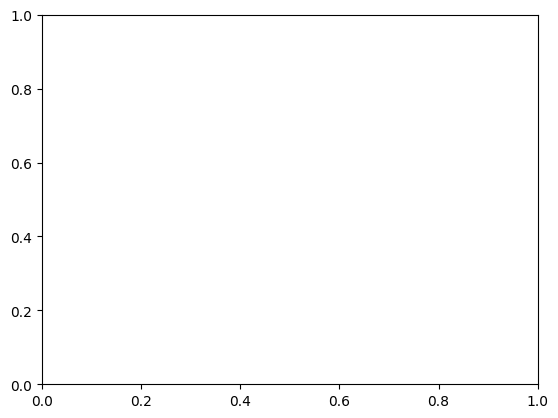